# 문제1)
정규분포를 따르는 난수 1,000개를 x변수에 저장하고, y변수는 x변수의 코사인 값을 저장하여 산점도 차트를 출력하시오.     
   - <조건1> x, y 변수 : placeholder()함수 이용 
   - <조건2> x변수 : x_data 공급
   - <조건3> y변수 : y_data 공급 
   - <조건4> 산점도 차트 : matplotlib.pyplot 함수 이용   

In [1]:
import numpy as np # 공급 data 생성 
import matplotlib.pyplot as plt # 산점도 : plt.scatter(x, y)
import tensorflow.compat.v1 as tf # ver 1.x
tf.disable_v2_behavior() # ver 2.x 사용안함 

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# 변수, data 정의
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

x_data = np.random.randn(1000)
y_data = np.cos(x_data)

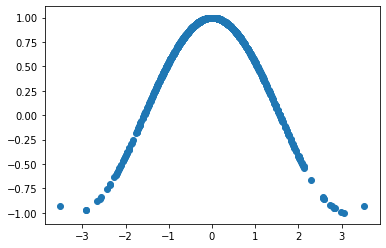

In [3]:
# 세션 생성 : <조건2> ~ <조건4>
with tf.Session() as sess :
    
    # <조건2> : x변수 실행 
    X = sess.run(x, feed_dict={x:x_data})
    
    # <조건3> : y변수 실행 
    Y = sess.run(y, feed_dict={y:y_data})
    
    # <조건4> : 산점도 시각화 
    plt.scatter(X,Y)
    plt.show()

# 문제2)
다음과 같이 변수를 선언하여 회귀방정식을 계산하시오.
  -  조건1> X변수 : placeholder()이용 [None행 3열] 배열 선언
       -> X변수 값 할당 : [[1,2,3]]
  -  조건2> a변수 : Variable()이용 정규분포를 따르는 난수 [3행1열]배열 선언
  -  조건3> b변수 : Variable()이용 정규분포를 따르는 난수 [1행1열] 배열 선언    
  -  조건4> 계산식 : expr = (X * a) + b (단, Tensorflow 함수 이용) 

In [4]:
import tensorflow.compat.v1 as tf # ver 1.x
tf.disable_v2_behavior() # ver 2.x 사용안함 

# X변수 정의
X = tf.placeholder(dtype=tf.float32, shape=[None, 3])

# a,b 변수 정의 
a = tf.Variable(tf.random_normal([3, 1])) 
b = tf.Variable(tf.random_normal([1, 1]))

In [5]:

# session object
with tf.Session() as sess :
    init = tf.global_variables_initializer()
    sess.run(init)
    x_data = [[1,2,3]]
    
    print("X: \n",sess.run(X,feed_dict={X:x_data}))    
    print("a: \n",sess.run(a))
    print("b: \n",sess.run(b))
    

    exp = tf.add(tf.multiply(X,a),b)

    expr = sess.run(exp, feed_dict={X:x_data})
    print("expr: \n", expr)
    

X: 
 [[1. 2. 3.]]
a: 
 [[ 0.5767627 ]
 [ 0.22883917]
 [-2.2263572 ]]
b: 
 [[0.10976895]]
expr: 
 [[ 0.6865316   1.2632943   1.840057  ]
 [ 0.33860812  0.5674473   0.79628646]
 [-2.1165884  -4.3429456  -6.5693026 ]]


# 문제3)
bmi.csv 파일을 가져와서 1,2칼럼은 x변수에 3칼럼은 y변수에 저장하여 처리하시오.
  - 조건1> x변수 : placeholder()이용 None행2열 배열 선언
  - 조건2> y변수 : placeholder()이용 1차원 배열 선언
  - 조건3> 칼럼 단위 평균 계산, label 빈도수 출력   


In [6]:
import pandas as pd 

import tensorflow.compat.v1 as tf # ver 1.x
tf.disable_v2_behavior() # ver 2.x 사용안함 


In [16]:
bmi = pd.read_csv("C:/IITT/6_Tensorflow/data/bmi.csv")
bmi.info()

x_data = bmi.iloc[:,[0,1]]
y_data = bmi.iloc[:,2]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   height  20000 non-null  int64 
 1   weight  20000 non-null  int64 
 2   label   20000 non-null  object
dtypes: int64(2), object(1)
memory usage: 468.9+ KB


In [18]:
# 변수 정의
X = tf.placeholder(dtype = tf.int32, shape = [None,2])
Y = tf.placeholder(dtype = tf.string, shape = [None])

In [20]:
with tf.Session() as sess:
    x,y = sess.run([X,Y], feed_dict={X:x_data, Y:y_data})
    pd_x = pd.DataFrame(x, columns=['height','weight'])
    print("키 평균 : %.3f"%(pd_x['height'].mean()))
    print("몸무게 평균 : %.2f"%(pd_x['weight'].mean()))
    
    pd_y = pd.Series(y)
    print('\n label 빈도수 : \n', pd_y.value_counts())

키 평균 : 164.938
몸무게 평균 : 62.41

 label 빈도수 : 
 normal    7677
fat       7425
thin      4898
dtype: int64
